In [1]:
!pip install ultralytics

In [2]:
!nvidia-smi

Sun Jun 22 04:17:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
from ultralytics import YOLO
from IPython.display import Image, display

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eSCang8WY4Z1vQlZeH9h")
project = rf.workspace("yolov8segworkspace").project("person-mfa1g")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [5]:
model = YOLO("yolo11m-seg.pt")

100%|██████████| 43.3M/43.3M [00:00<00:00, 296MB/s]


In [8]:
results = model.train(data="/content/person-2/data.yaml", epochs=50,imgsz=640)

Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/person-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

100%|██████████| 755k/755k [00:00<00:00, 86.8MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

 13                  -1  1   1642496  ultralytics.nn.modules.block.C3k2            [1024, 512, 1, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    542720  ultralytics.nn.modules.block.C3k2            [1024, 256, 1, True]          
 17                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 20                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 287MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1534.5±538.3 MB/s, size: 63.0 KB)


train: Scanning /content/person-2/train/labels... 2551 images, 22 backgrounds, 0 corrupt: 100%|██████████| 2551/2551 [00:01<00:00, 1867.10it/s]

train: /content/person-2/train/images/2008_001965_jpg.rf.8951596fd31ce601aa7b14ed9c9e6b98.jpg: 1 duplicate labels removed
train: /content/person-2/train/images/2008_008479_jpg.rf.d37b52b4025a3d5048383f51e6e8cedc.jpg: 1 duplicate labels removed


train: New cache created: /content/person-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 665.6±294.3 MB/s, size: 55.5 KB)


val: Scanning /content/person-2/valid/labels... 596 images, 5 backgrounds, 0 corrupt: 100%|██████████| 596/596 [00:00<00:00, 744.27it/s]

val: New cache created: /content/person-2/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.44G      1.138      2.496      1.552      1.382         33        640: 100%|██████████| 160/160 [02:11<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.38it/s]


                   all        596       1417       0.32      0.239      0.155     0.0593      0.233      0.174     0.0766     0.0202

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.67G       1.57      3.263      1.939      1.706         32        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.29it/s]


                   all        596       1417      0.341      0.282      0.229     0.0851      0.248      0.169      0.119     0.0318

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.69G      1.514      3.259      1.911      1.659         42        640: 100%|██████████| 160/160 [02:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.33it/s]


                   all        596       1417      0.393       0.43      0.315      0.138      0.386      0.392      0.287      0.109

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.67G       1.45      3.161      1.818      1.597         20        640: 100%|██████████| 160/160 [02:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.35it/s]


                   all        596       1417      0.427      0.404      0.337      0.155       0.41       0.34      0.261      0.089

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.68G      1.368      2.984      1.758      1.553         36        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.34it/s]


                   all        596       1417       0.57      0.507      0.509      0.256       0.59      0.457      0.467      0.208

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.67G      1.297      2.853      1.661      1.516         38        640: 100%|██████████| 160/160 [02:06<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.34it/s]


                   all        596       1417       0.66      0.534       0.58      0.321      0.681      0.485      0.535       0.26

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.76G      1.261       2.77      1.599      1.493         41        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.36it/s]


                   all        596       1417      0.631      0.511      0.541      0.303      0.612      0.492       0.51      0.256

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.75G      1.221      2.717      1.551      1.463         32        640: 100%|██████████| 160/160 [02:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.35it/s]


                   all        596       1417      0.622      0.553      0.561      0.316      0.623      0.519      0.527      0.248

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.73G      1.176      2.616      1.502      1.431         31        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.38it/s]


                   all        596       1417       0.71      0.582       0.64      0.383      0.685      0.559      0.595      0.298

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.71G      1.138      2.523      1.432      1.404         45        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.38it/s]


                   all        596       1417      0.656      0.559      0.586       0.35      0.653      0.554       0.57      0.304

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.74G      1.117      2.476      1.414      1.389         26        640: 100%|██████████| 160/160 [02:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.35it/s]


                   all        596       1417       0.68      0.585      0.636      0.381      0.664      0.549      0.585      0.295

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.72G      1.104      2.401      1.384      1.374         26        640: 100%|██████████| 160/160 [02:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.40it/s]


                   all        596       1417      0.713      0.603      0.664      0.415      0.738      0.589      0.644      0.361

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.72G        1.1      2.404      1.389      1.378         35        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.36it/s]


                   all        596       1417      0.757      0.603      0.671      0.417      0.754      0.586      0.643       0.35

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.66G      1.078      2.372      1.351      1.354         52        640: 100%|██████████| 160/160 [02:07<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.36it/s]


                   all        596       1417       0.74      0.636      0.685      0.437      0.741       0.62      0.665      0.374

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.73G      1.067      2.339      1.331      1.348         25        640: 100%|██████████| 160/160 [02:07<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.38it/s]


                   all        596       1417      0.759      0.608      0.685      0.433       0.75      0.589      0.651      0.374

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.73G      1.012      2.245      1.265      1.318         17        640: 100%|██████████| 160/160 [02:07<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.35it/s]

                   all        596       1417      0.777      0.617      0.693       0.44      0.768      0.607      0.667      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.69G      1.035      2.261      1.298      1.335         33        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.41it/s]

                   all        596       1417      0.756      0.618      0.705      0.463      0.746      0.608       0.68        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50       9.7G     0.9791      2.204      1.229      1.301         22        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.35it/s]

                   all        596       1417      0.761      0.655      0.716      0.476      0.754      0.637      0.699      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.77G      0.976      2.149      1.219      1.292         43        640: 100%|██████████| 160/160 [02:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.41it/s]


                   all        596       1417      0.786      0.656      0.734      0.496      0.793      0.649      0.723      0.442

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.78G     0.9597      2.143      1.189      1.282         27        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.41it/s]

                   all        596       1417      0.777      0.636      0.713      0.485      0.785      0.614      0.692      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.75G     0.9577      2.124      1.176      1.278         37        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.42it/s]

                   all        596       1417      0.768      0.635      0.712      0.485      0.751      0.623      0.691      0.422



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.73G     0.9516      2.068      1.177      1.268         21        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.40it/s]

                   all        596       1417       0.79      0.644      0.723      0.492      0.793       0.63      0.705      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.78G     0.9257       2.01      1.147      1.253         31        640: 100%|██████████| 160/160 [02:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.39it/s]

                   all        596       1417      0.824      0.641      0.745      0.525      0.802      0.649      0.731      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.83G      0.924      1.994      1.126      1.253         23        640: 100%|██████████| 160/160 [02:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.35it/s]

                   all        596       1417      0.798      0.678      0.752      0.528      0.787      0.664      0.731      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.77G     0.9045      2.013      1.123       1.25         32        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.42it/s]

                   all        596       1417      0.789      0.655      0.729      0.499      0.777      0.643       0.71      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.77G     0.9004      1.974       1.11      1.245         22        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.36it/s]

                   all        596       1417      0.825      0.662      0.754       0.53      0.813       0.65      0.732      0.461



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.69G     0.8887      1.942      1.093      1.232         34        640: 100%|██████████| 160/160 [02:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.41it/s]

                   all        596       1417      0.813      0.657      0.754      0.547      0.803      0.649      0.738      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.86G      0.869      1.918      1.071      1.227         27        640: 100%|██████████| 160/160 [02:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.36it/s]

                   all        596       1417      0.782      0.682      0.754      0.536      0.794      0.667      0.747      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50       9.8G      0.847      1.875      1.046      1.207         25        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.42it/s]

                   all        596       1417      0.797      0.694      0.765      0.551      0.794      0.682      0.752      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.73G     0.8357      1.889      1.046      1.201         35        640: 100%|██████████| 160/160 [02:06<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.35it/s]

                   all        596       1417      0.838      0.653      0.767      0.553      0.829      0.644      0.752       0.49



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50       9.8G     0.8428      1.823      1.028        1.2         30        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.41it/s]

                   all        596       1417        0.8       0.67      0.756      0.538      0.802      0.661       0.74      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50       9.8G     0.8327      1.803      1.012      1.203         39        640: 100%|██████████| 160/160 [02:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.42it/s]

                   all        596       1417      0.816      0.692      0.779      0.571      0.803      0.689      0.767      0.514



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.74G     0.8098      1.797     0.9871      1.188         22        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.42it/s]

                   all        596       1417       0.83       0.67      0.772      0.566      0.831      0.675      0.767      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.72G     0.7982       1.74     0.9715      1.179         48        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.41it/s]

                   all        596       1417      0.833      0.691      0.783      0.578      0.827      0.687      0.769      0.514



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.79G      0.788      1.737     0.9645      1.168         23        640: 100%|██████████| 160/160 [02:07<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.41it/s]

                   all        596       1417      0.815      0.704      0.779      0.584      0.819      0.699      0.777      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.77G      0.785      1.704     0.9406      1.167         30        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.40it/s]

                   all        596       1417      0.823      0.698      0.783      0.585       0.81      0.712      0.776      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.71G     0.7593      1.672     0.9306      1.156         54        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.37it/s]

                   all        596       1417      0.823       0.72      0.791      0.599      0.824      0.716      0.785      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.77G     0.7492      1.621     0.9121       1.15         45        640: 100%|██████████| 160/160 [02:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.42it/s]

                   all        596       1417      0.839      0.708      0.792       0.59      0.847      0.712      0.787      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.77G     0.7532      1.632     0.9178      1.147         70        640: 100%|██████████| 160/160 [02:07<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.42it/s]

                   all        596       1417      0.853      0.687      0.781      0.589       0.84      0.687      0.771      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.78G     0.7437      1.609     0.8834      1.142         34        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.42it/s]

                   all        596       1417      0.848      0.697      0.791      0.602      0.841      0.703      0.791      0.551


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.66G     0.7528      1.635      0.909      1.177         15        640: 100%|██████████| 160/160 [02:07<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.38it/s]

                   all        596       1417      0.807      0.724      0.795       0.61      0.817      0.719       0.79      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.73G     0.7369      1.573     0.8261      1.162         17        640: 100%|██████████| 160/160 [02:06<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.41it/s]

                   all        596       1417      0.839      0.721      0.798      0.611      0.844      0.715       0.79      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.63G     0.7116      1.524     0.8071      1.145         20        640: 100%|██████████| 160/160 [02:05<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.39it/s]

                   all        596       1417      0.823      0.726      0.797       0.61      0.825      0.722      0.793      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.66G     0.6962      1.499     0.7872      1.136         13        640: 100%|██████████| 160/160 [02:05<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.42it/s]

                   all        596       1417      0.835       0.72      0.803      0.619      0.835      0.713      0.797      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.69G     0.6784      1.467     0.7672      1.121         20        640: 100%|██████████| 160/160 [02:05<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.42it/s]

                   all        596       1417      0.874      0.692      0.806      0.622      0.868      0.696      0.804      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.65G     0.6494      1.417     0.7269      1.097         24        640: 100%|██████████| 160/160 [02:05<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.42it/s]

                   all        596       1417      0.844      0.718      0.803      0.618       0.85      0.714      0.802      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.66G     0.6559       1.42     0.7247      1.108         15        640: 100%|██████████| 160/160 [02:05<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.41it/s]

                   all        596       1417      0.828      0.732      0.806      0.623      0.841      0.727      0.802      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.69G     0.6347      1.388     0.7078      1.091         15        640: 100%|██████████| 160/160 [02:05<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.43it/s]

                   all        596       1417      0.848      0.732      0.809       0.63      0.855      0.723      0.805      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.65G     0.6333      1.368     0.6905      1.087         34        640: 100%|██████████| 160/160 [02:05<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.43it/s]

                   all        596       1417       0.84      0.732       0.81      0.634      0.839      0.732      0.806      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.64G     0.6083       1.32     0.6661      1.071         13        640: 100%|██████████| 160/160 [02:05<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.44it/s]

                   all        596       1417      0.854      0.731      0.811      0.634      0.854      0.728      0.806      0.583



50 epochs completed in 2.042 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 45.2MB
Optimizer stripped from runs/segment/train/weights/best.pt, 45.2MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-seg summary (fused): 138 layers, 22,336,083 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/19 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   5%|▌         | 1/19 [00:00<00:14,  1.23it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  11%|█         | 2/19 [00:02<00:18,  1.11s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:17<00:00,  1.12it/s]


                   all        596       1417       0.85      0.732      0.812      0.634      0.856      0.729      0.806      0.582
Speed: 0.6ms preprocess, 14.2ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/segment/train


In [10]:
 !ls "/content/runs/segment/train"

args.yaml			 MaskR_curve.png      train_batch6402.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
labels_correlogram.jpg		 train_batch0.jpg     val_batch1_labels.jpg
labels.jpg			 train_batch1.jpg     val_batch1_pred.jpg
MaskF1_curve.png		 train_batch2.jpg     val_batch2_labels.jpg
MaskP_curve.png			 train_batch6400.jpg  val_batch2_pred.jpg
MaskPR_curve.png		 train_batch6401.jpg  weights


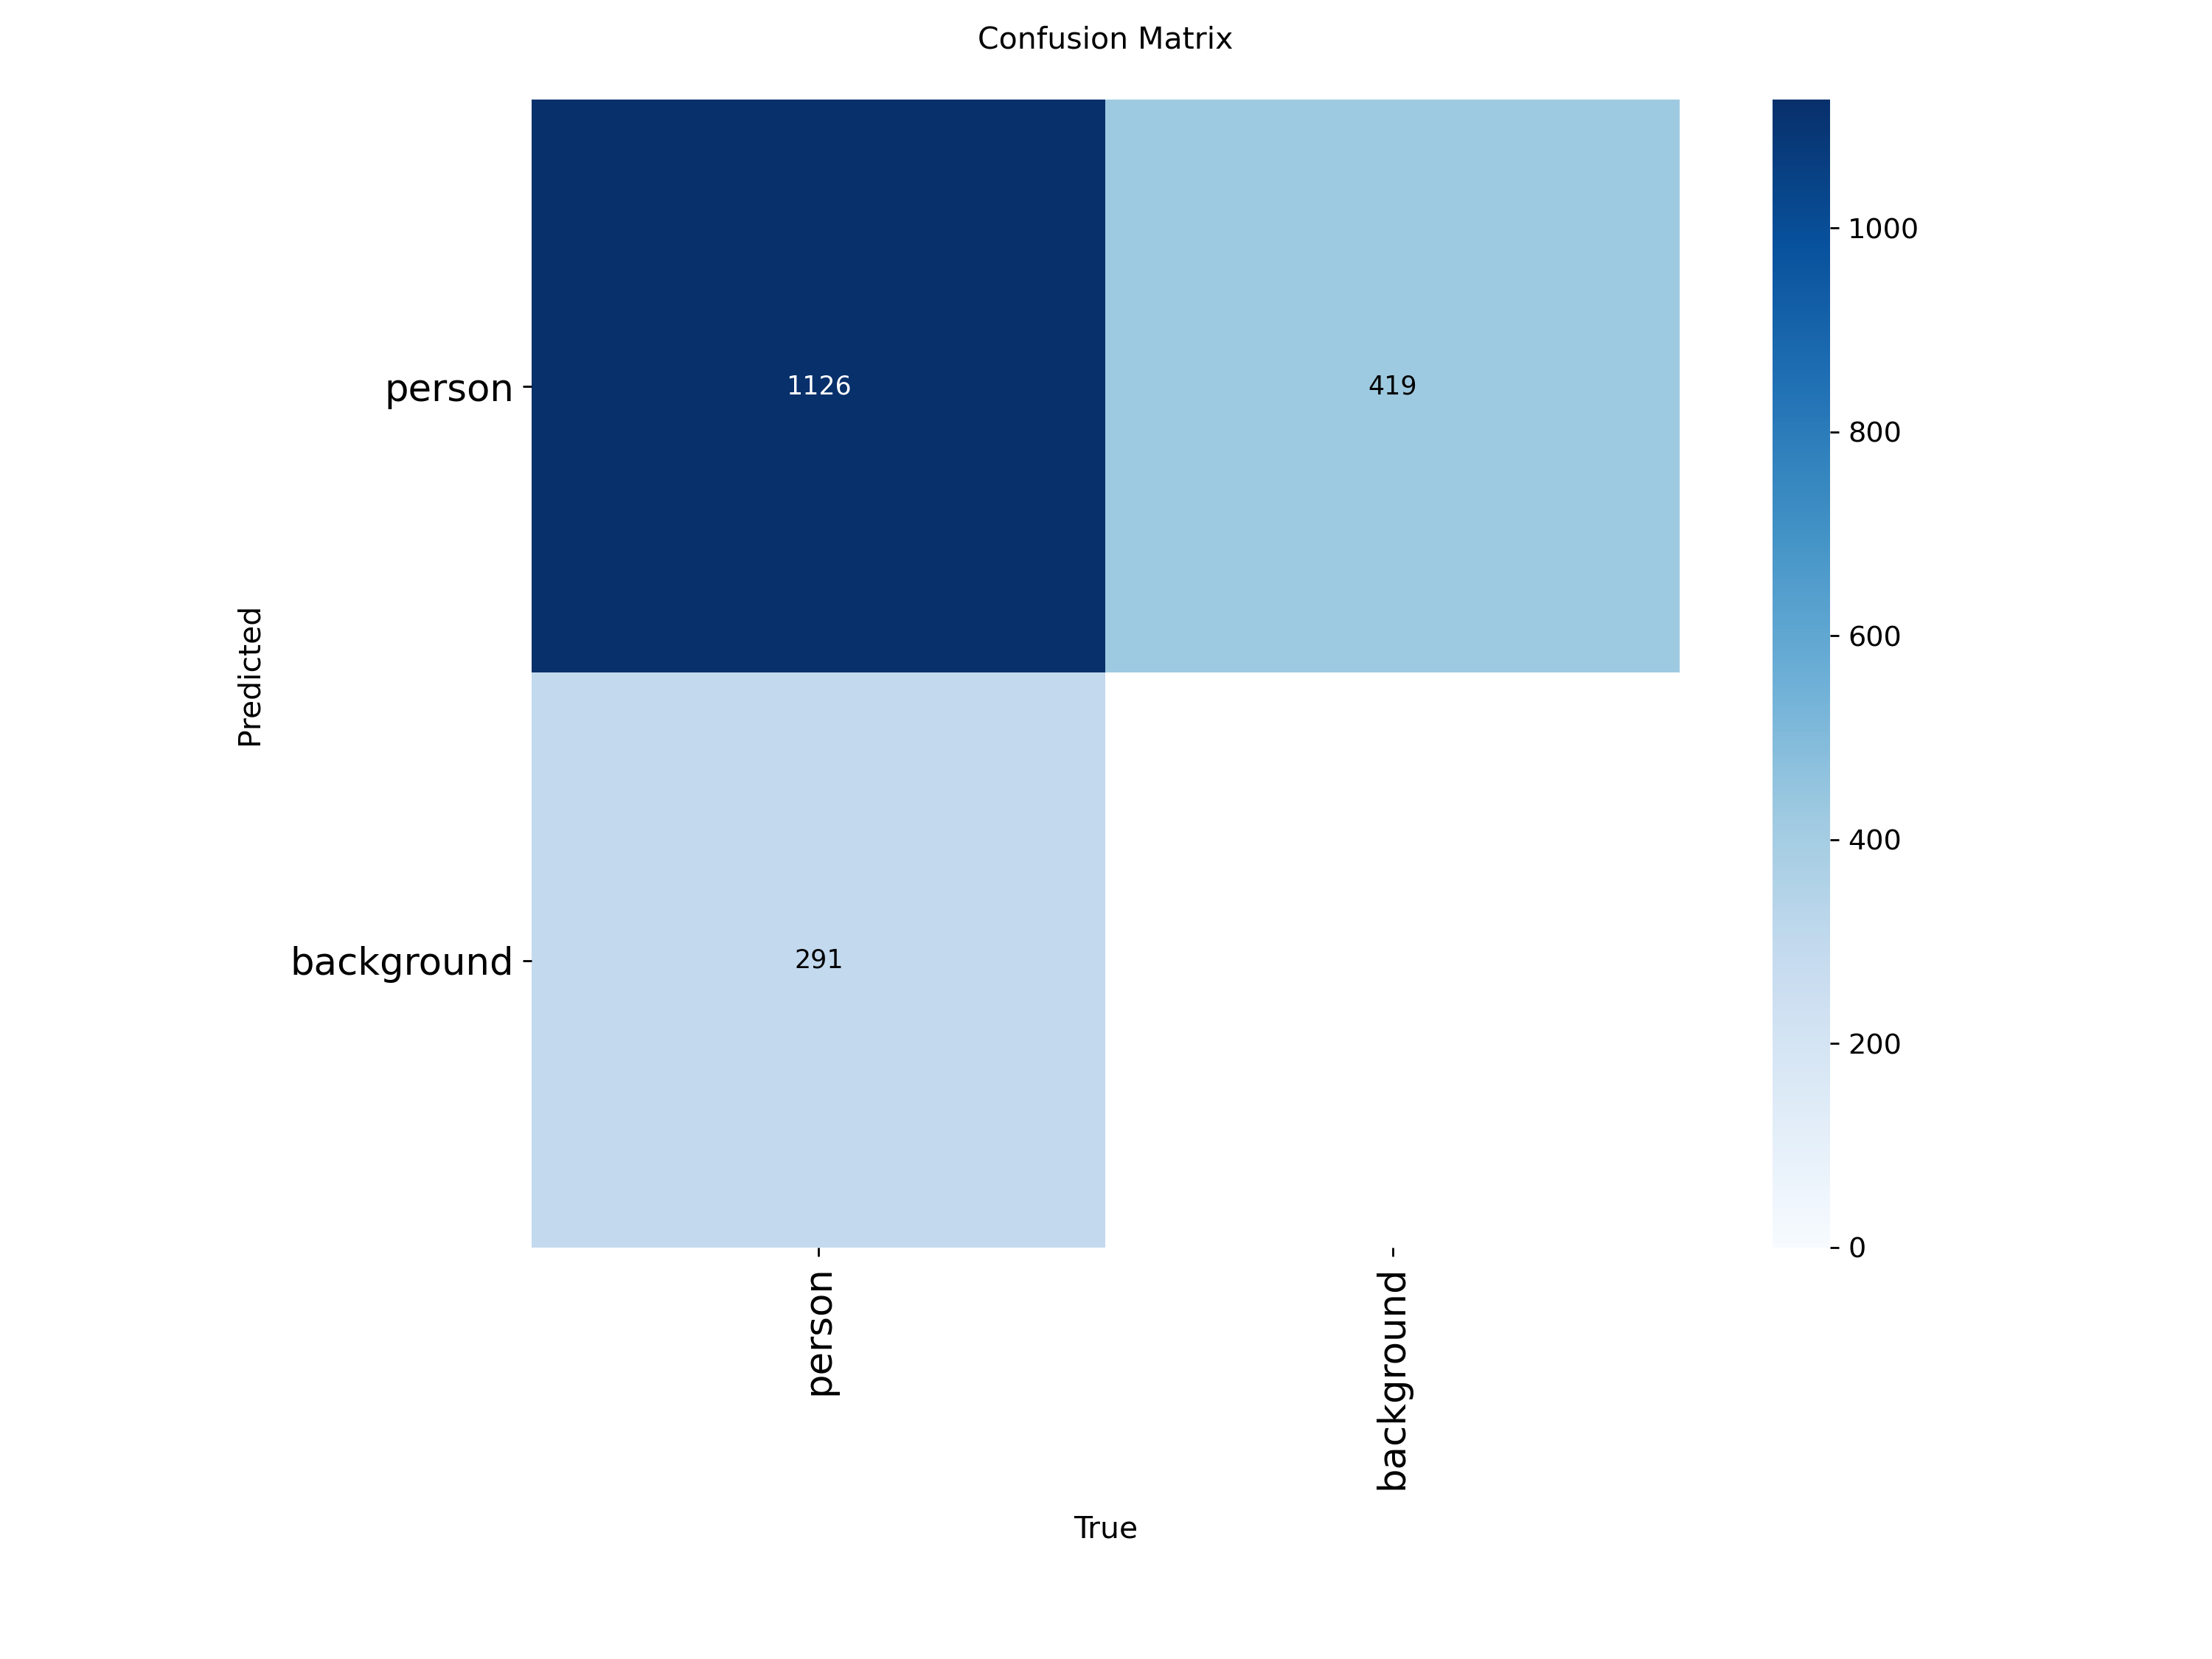

In [11]:
Image(filename="/content/runs/segment/train/confusion_matrix.png", width=600)

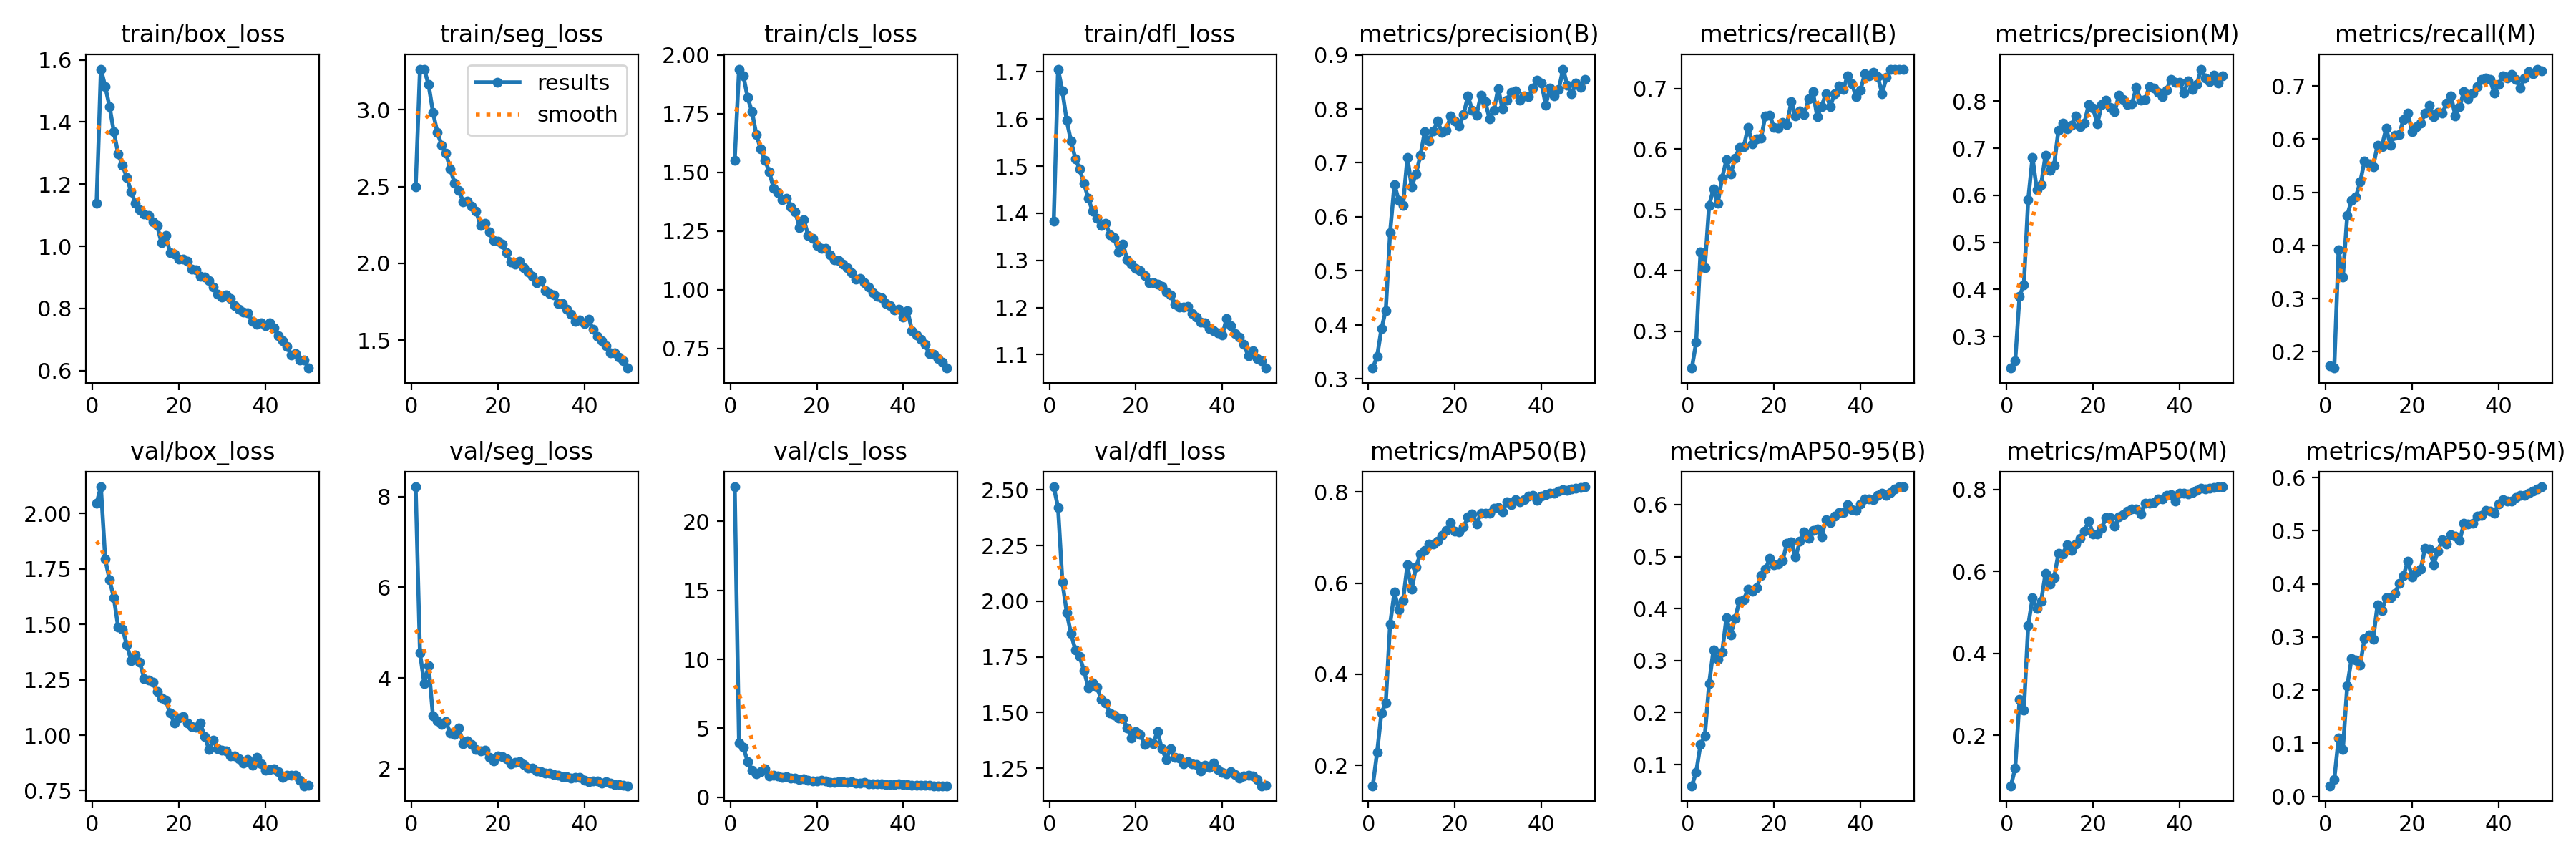

In [12]:
Image(filename="/content/runs/segment/train/results.png", width=600)

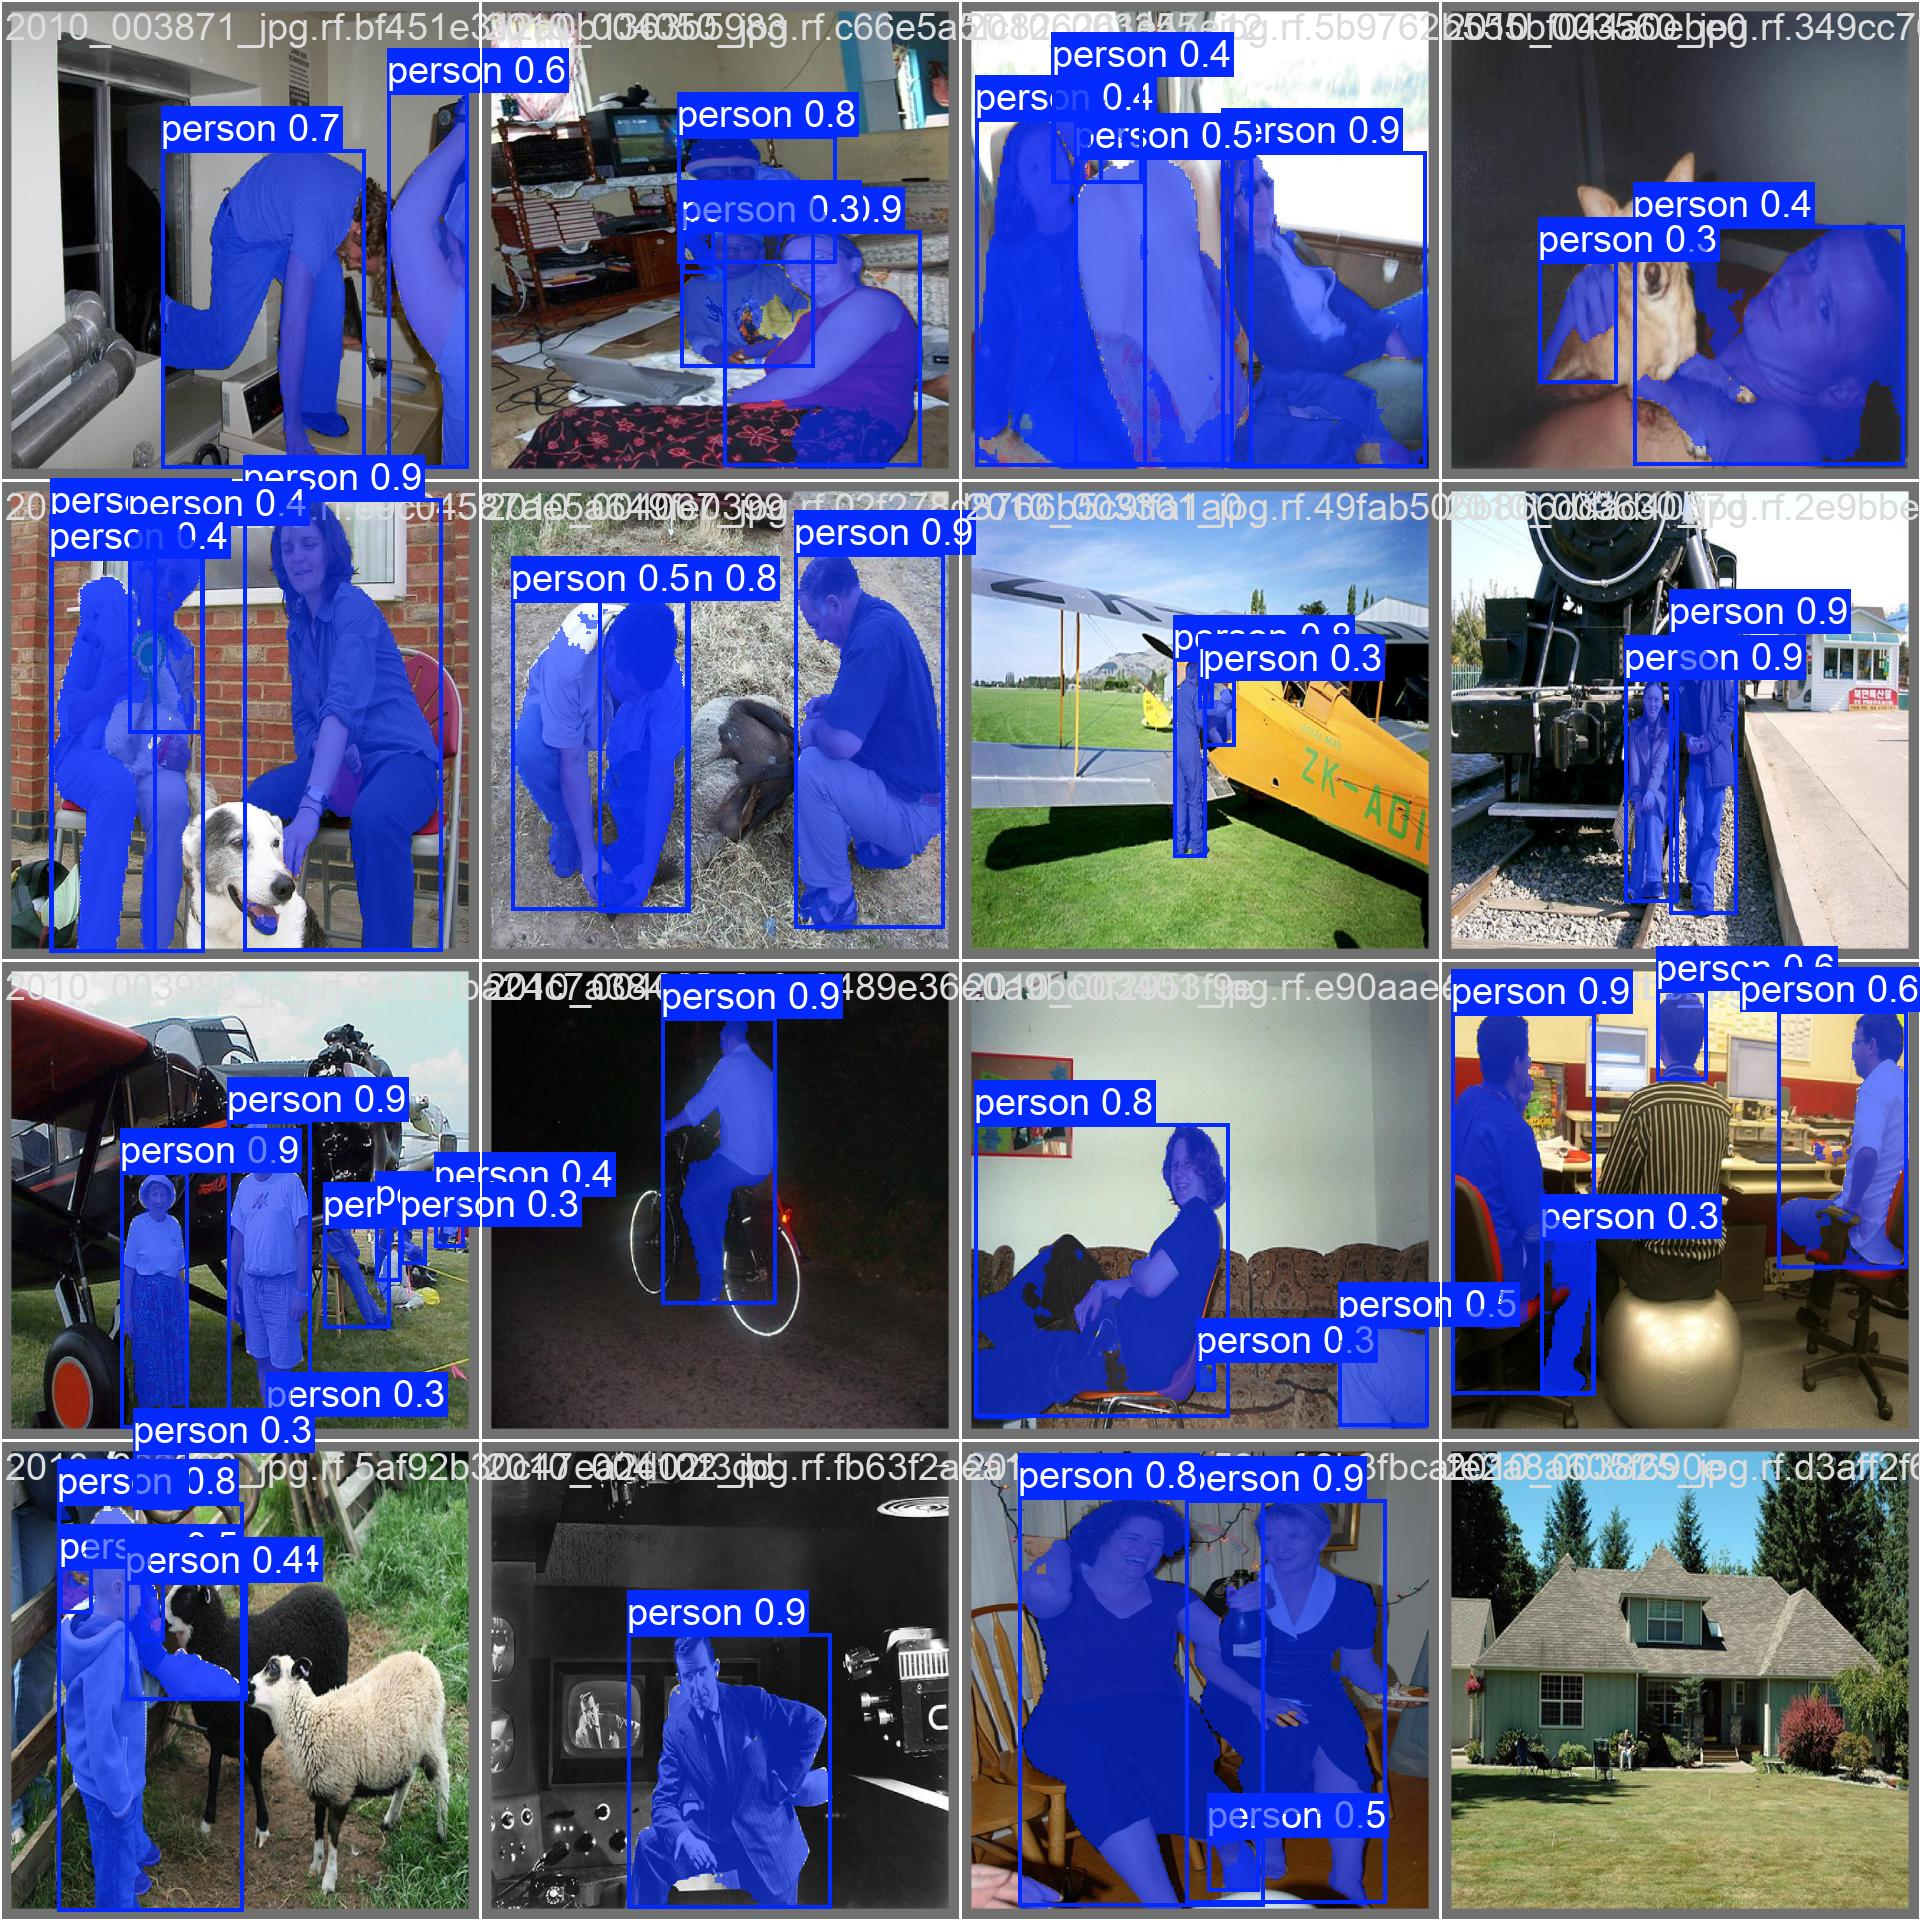

In [13]:
Image(filename="/content/runs/segment/train/val_batch0_pred.jpg", width=600)

In [14]:
model=YOLO("/content/runs/segment/train/weights/best.pt")

In [15]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps

Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-seg summary (fused): 138 layers, 22,336,083 parameters, 0 gradients, 123.0 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1553.3±578.2 MB/s, size: 48.1 KB)


val: Scanning /content/person-2/valid/labels.cache... 596 images, 5 backgrounds, 0 corrupt: 100%|██████████| 596/596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/38 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   3%|▎         | 1/38 [00:01<00:37,  1.00s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   5%|▌         | 2/38 [00:02<00:47,  1.31s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.47it/s]


                   all        596       1417      0.853      0.731      0.811      0.635      0.853      0.728      0.806      0.582
Speed: 1.0ms preprocess, 32.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/segment/val


array([    0.58175])

In [20]:
results = model.predict("/content/gettyimages-1369199360-612x612.jpg")  # predict on an image



WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/gettyimages-1369199360-612x612.jpg: 448x640 1 person, 38.5ms
Speed: 5.3ms preprocess, 38.5ms inference, 5.1ms postprocess per image at shape (1, 3, 448, 640)


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


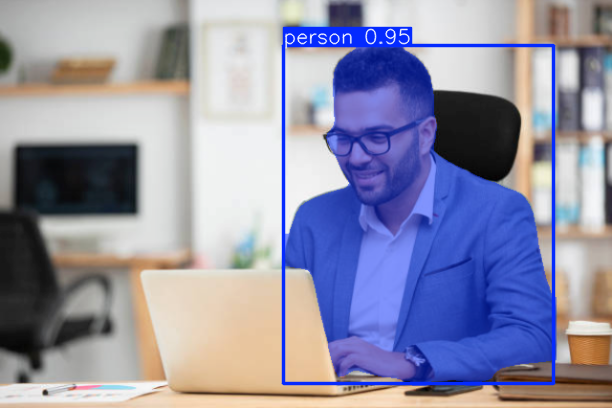

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


In [25]:
results[0].show()